## Importing The Required Libraries

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv("train.csv")

data.head(10)

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy
5,5,de_0146666,product_de_0935874,reviewer_de_0917477,1,"Schmeckt einfach nicht gut, es kostet ziemlich...",Nicht lecker,de,drugstore
6,6,de_0846730,product_de_0400718,reviewer_de_0893909,1,Ich finde das Hase sieht in echt ganz anders a...,Fehlbestellung,de,toy
7,7,de_0833758,product_de_0115194,reviewer_de_0953310,1,"Habe diesen Artikel bestellt,war auf meiner Wu...",Fehlkauf,de,home_improvement
8,8,de_0055293,product_de_0034085,reviewer_de_0253995,1,Die Lampe ist nach einem Jahr bei nur gelegent...,Nach kurzer Zeit defekt,de,baby_product
9,9,de_0232738,product_de_0901865,reviewer_de_0033281,1,Kaum Saat aufgegangen.,Schlechte Mischung,de,lawn_and_garden


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

## Describing the Dataset

In [ ]:
# class to describe dataset

class Describer:

    # initialize object
    def __init__(self, df):
        self.df = df

    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

In [ ]:
# creating an instance of the class describer
describe_df = Describer(data)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 1200000 rows
	* 8 columns 



In [ ]:
# lets print summary infomation on the dataset
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   review_id         1200000 non-null  object
 1   product_id        1200000 non-null  object
 2   reviewer_id       1200000 non-null  object
 3   stars             1200000 non-null  int64 
 4   review_body       1200000 non-null  object
 5   review_title      1199967 non-null  object
 6   language          1200000 non-null  object
 7   product_category  1200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 73.2+ MB
None 



### summary of data understanding

## Data Processing
we will be preparing our data for analysis by checking for attributes such as missing values ,duplicates and other inconsistencies as computed below

###### Handling Missing Values

In [ ]:
# identify missing
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list
        missing.append(i)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

identify_missing_values(data)

The Data has missing values.


In [ ]:
# function to display missing values

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_values(data)

,Missing Values,Percentage(%)
review_title,33,0.000028


Handle missing value in 'review_title' column

In [ ]:
data['review_title'] = data.apply(
    lambda row: row['review_body'].split('.')[0] if pd.isnull(row['review_title']) else row['review_title'],
    axis=1
)

In [ ]:
test_data = pd.read_csv('./data.csv')

validation_data = pd.read_csv('./validation.csv')

In [ ]:
# Function to identify very short reviews in the datasets
def find_short_reviews(df, threshold=10):
    short_reviews = df[df['review_body'].apply(lambda x: len(str(x)) < threshold)]
    return short_reviews.shape[0], short_reviews

# Identify short reviews in the cleaned test and validation datasets
short_reviews_test_count, short_reviews_test = find_short_reviews(test_data)
short_reviews_validation_count, short_reviews_validation = find_short_reviews(validation_data)

short_reviews_test_count, short_reviews_validation_count


(0, 0)

In [ ]:
import re
from nltk.tokenize import word_tokenize

# Function for normalization: converting to lowercase, removing punctuation, and removing numbers
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function for tokenization
def tokenize_text(text):
    return word_tokenize(text)


# Normalize and tokenize the 'review_body' column
test_data['normalized_text'] = test_data['review_body'].apply(normalize_text).apply(tokenize_text)
validation_data['normalized_text'] = validation_data['review_body'].apply(normalize_text).apply(tokenize_text)

# Display the original and processed text for comparison
test_data[['review_body', 'normalized_text']].head(), validation_data[['review_body', 'normalized_text']].head()


(                                         review_body  \
 0  Leider, leider nach einmal waschen ausgebliche...   
 1  zunächst macht der Anker Halter einen soliden ...   
 2  Siegel sowie Verpackung war beschädigt und war...   
 3  Habe dieses Produkt NIE erhalten und das Geld ...   
 4                 Die Träger sind schnell abgerissen   
 
                                      normalized_text  
 0  [leider, leider, nach, einmal, waschen, ausgeb...  
 1  [zunächst, macht, der, anker, halter, einen, s...  
 2  [siegel, sowie, verpackung, war, beschädigt, u...  
 3  [habe, dieses, produkt, nie, erhalten, und, da...  
 4           [die, träger, sind, schnell, abgerissen]  ,
                                          review_body  \
 0  Das Produkt kam bis heute nicht bei mir an. Ic...   
 1  Gebrauchte Spinner, teilzerlegt und teilweise ...   
 2  Bei beiden Bestellungen war jeweils eine Glühb...   
 3                             Sofort zurückgeschickt   
 4  wie man auf den Fotos erkennen

## Exploratory Data Analysis (EDA)

#### Introduction

We  will conduct Univariate and Bivariate analysis of the sentiments and create visualizations  to see how they relate with each other and individually.

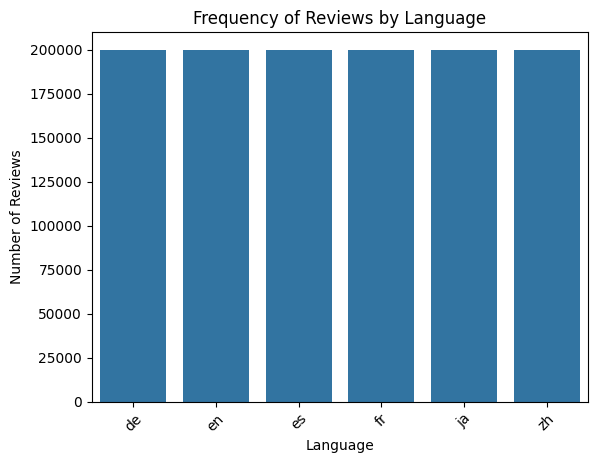

In [ ]:
# Frequency of reviews per language (Categorical)
sns.countplot(x='language', data=data)
plt.title('Frequency of Reviews by Language')
plt.xlabel('Language')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

The reviews are well-distributed across different languages, with each language having a significant number of reviews. This shows that the dataset is diverse and suitable for developing a multilingual sentiment analysis model.

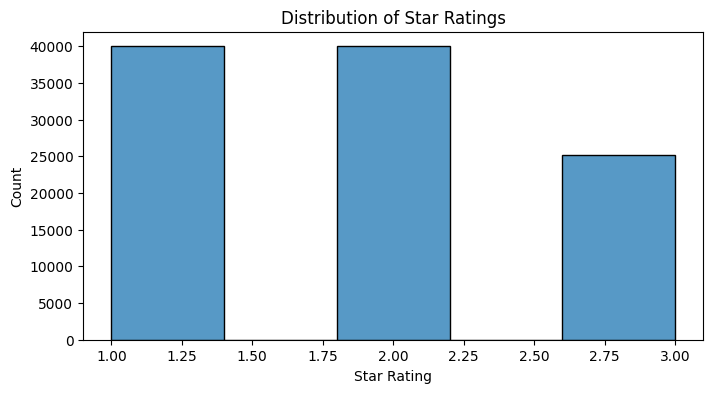

In [ ]:
# Distribution of Star Ratings (Numerical)
plt.figure(figsize=(8, 4))
sns.histplot(data['stars'], bins=5, kde=False)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

The distribution of star ratings appears to be fairly uniform, with each rating from 1 to 5 stars having a substantial presence in the dataset. The uniform distribution suggests the dataset is curated to have a balance of sentiments, which is good for training a sentiment analysis model as it avoids class imbalance issues.

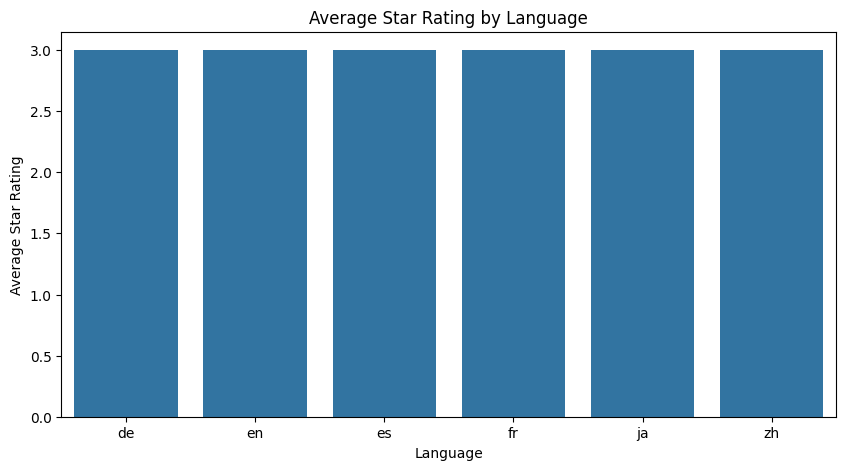

In [ ]:
# Bivariate Analysis
# Average star rating by language (Sentiment vs. Categorical)
train_data = data
plt.figure(figsize=(10, 5))
sns.barplot(x='language', y='stars', data=train_data, estimator=np.mean, ci=None)
plt.title('Average Star Rating by Language')
plt.xlabel('Language')
plt.ylabel('Average Star Rating')
plt.show()

The average star ratings across languages are relatively even, hovering around the middle of the scale about 2.5 to 3 out of 5.Suggesting that language may not be a significant factor influencing the sentiment of the reviews, or that the dataset is balanced across languages in terms of sentiment.

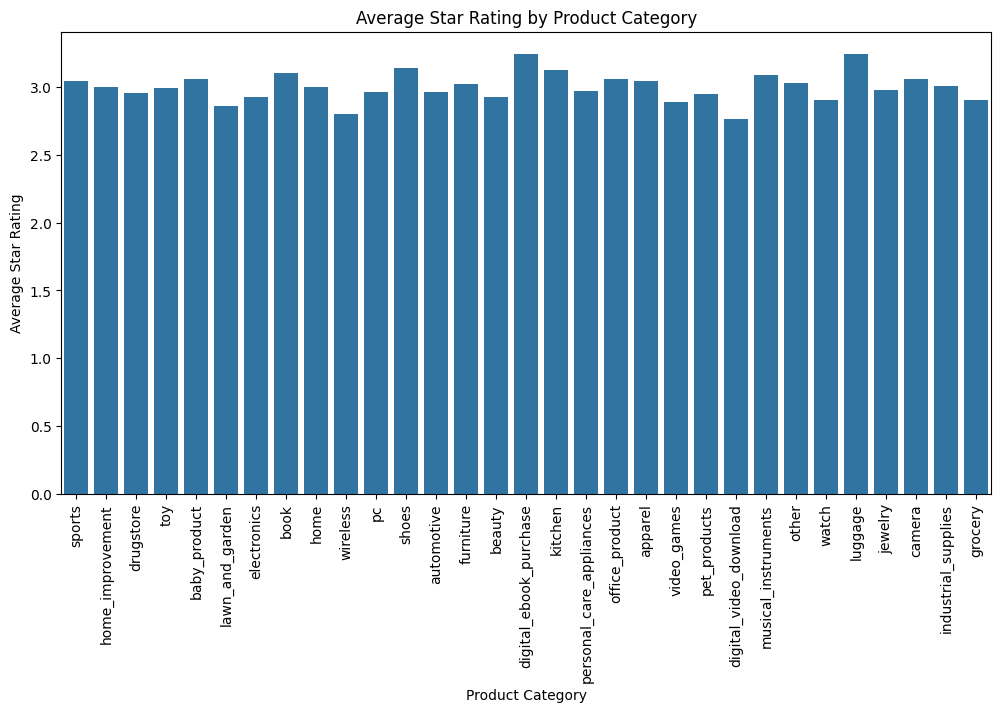

In [ ]:
# Average star rating by product category (Sentiment vs. Categorical)
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category', y='stars', data=train_data, estimator=np.mean, ci=None)
plt.title('Average Star Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=90)
plt.show()

The average star ratings across different product categories do not vary widely and remain around the middle of the scale.However, certain categories like 'luggage' and 'digital_ebook_purchase' show a slightly higher average rating compared to others like 'sports' and 'home improvement'.
This indicates that sentiment might vary with product category, and some categories might be more prone to higher or lower ratings.

## Feature Extraction

In [ ]:
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


# Initialize the TF-IDF Vectorizer with a smaller number of features to save memory
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 1))

# Use fit_transform on a representative sample to determine the feature set
representative_sample = test_data.sample(n=10000, random_state=42)
tfidf_vectorizer.fit(representative_sample['review_body'].values.astype('U'))

# Initialize an empty list to hold the tfidf matrices for each chunk
list_of_tfidf_matrices = []

# Process the dataset in chunks to avoid memory errors
chunk_size = 10000
for i in range(0, len(test_data), chunk_size):
    chunk = test_data[i:i+chunk_size]
    tfidf_chunk = tfidf_vectorizer.transform(chunk['review_body'].values.astype('U'))
    list_of_tfidf_matrices.append(tfidf_chunk)

# Combine the TF-IDF matrices from all chunks into one matrix
tfidf_features = sparse.vstack(list_of_tfidf_matrices)

# Perform dimensionality reduction with TruncatedSVD
svd = TruncatedSVD(n_components=500)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Fit and transform the combined TF-IDF matrix
X_reduced = lsa.fit_transform(tfidf_features)



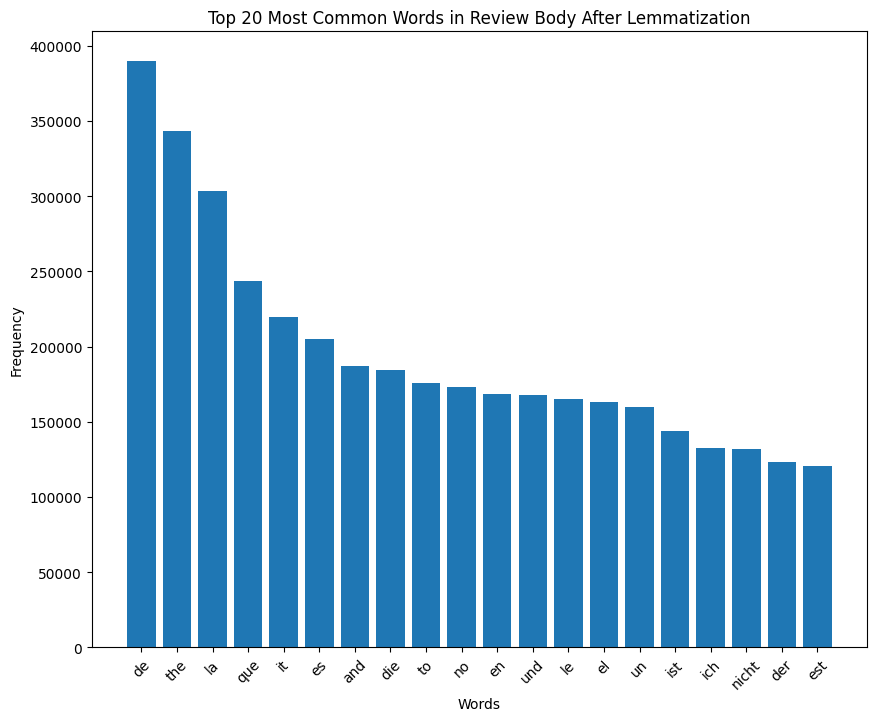

In [ ]:
import gensim
import matplotlib.pyplot as plt
from collections import Counter

# Correcting the tokenization and analysis process
if isinstance(data['review_body'].iloc[0], list):
    # If 'review_body' contains lists, join them into strings
    data['review_body_str'] = data['review_body'].apply(lambda x: ' '.join(x))
else:
    # Otherwise, work directly with 'review_body'
    data['review_body_str'] = data['review_body']

# Tokenize the processed text
tokens = data['review_body_str'].apply(gensim.utils.simple_preprocess)

# Flatten the list of tokens into a single list for frequency analysis
all_words = [word for sublist in tokens for word in sublist]

# Count the frequencies of each word
word_counts = Counter(all_words)

# Retrieve the most common words and their counts
most_common_words = word_counts.most_common(20)

# Only proceed with plotting if there are words to plot
if most_common_words:
    words, counts = zip(*most_common_words)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.title('Top 20 Most Common Words in Review Body After Lemmatization')
    plt.show()
else:
    print("No words to plot. Check if 'review_body' contains text data.")

The bar chart highlights that the dataset's most frequent terms are primarily common function words, such as "the" and "and," as well as stopwords from various languages, which suggests that further language-specific processing is needed.

In [ ]:
# tokenize the tweets
def tokenize_text(review):
    return word_tokenize(review)

test_data['review_body'] = test_data['review_body'].apply(tokenize_text)
test_data.head()


,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,normalized_text
0,0,de_0784695,product_de_0572654,reviewer_de_0645436,1,"[Leider, ,, leider, nach, einmal, waschen, aus...",Leider nicht zu empfehlen,de,home,"[leider, leider, nach, einmal, waschen, ausgeb..."
1,1,de_0759207,product_de_0567331,reviewer_de_0183703,1,"[zunächst, macht, der, Anker, Halter, einen, s...",Gummierung nach 6 Monaten kaputt,de,wireless,"[zunächst, macht, der, anker, halter, einen, s..."
2,2,de_0711785,product_de_0482105,reviewer_de_0182152,1,"[Siegel, sowie, Verpackung, war, beschädigt, u...",Flohmarkt ware,de,industrial_supplies,"[siegel, sowie, verpackung, war, beschädigt, u..."
3,3,de_0964430,product_de_0616480,reviewer_de_0991563,1,"[Habe, dieses, Produkt, NIE, erhalten, und, da...",Katastrophe,de,industrial_supplies,"[habe, dieses, produkt, nie, erhalten, und, da..."
4,4,de_0474538,product_de_0228702,reviewer_de_0316188,1,"[Die, Träger, sind, schnell, abgerissen]",Reißverschluss klemmt,de,luggage,"[die, träger, sind, schnell, abgerissen]"


In [ ]:
from nltk.corpus import stopwords


# Dictionary to hold stopwords for different languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'es': set(stopwords.words('spanish')),
    'zh': set(stopwords.words('chinese')),
}

def remove_language_specific_stopwords(text, lang):
    try:
        # Fetch the appropriate stopword set
        stop_words = stopwords_dict.get(lang, set())
        # Tokenize and remove stopwords
        tokens = [word for word in text.split() if word.lower() not in stop_words]
        # Join the tokens back into a string
        return " ".join(tokens)
    except:
        # Return original text if any error occurs
        return text

data['review_body'] = data.apply(lambda row: remove_language_specific_stopwords(row['review_body'], row['language']), axis=1)

data.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_str
0,0,de_0203609,product_de_0865382,reviewer_de_0267719,1.0,Armband leider 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports,Armband ist leider nach 1 Jahr kaputt gegangen
1,1,de_0559494,product_de_0678997,reviewer_de_0783625,1.0,Lieferung Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement,In der Lieferung war nur Ein Akku!
2,2,de_0238777,product_de_0372235,reviewer_de_0911426,1.0,"Stern, gar geht nicht. handelt gebraucht Waren...",Achtung Abzocke,de,drugstore,"Ein Stern, weil gar keine geht nicht. Es hande..."
3,3,de_0477884,product_de_0719501,reviewer_de_0836478,1.0,"Dachte, wären einfach festere Binden, vielleic...",Zu viel des Guten,de,drugstore,"Dachte, das wären einfach etwas festere Binden..."
4,4,de_0270868,product_de_0022613,reviewer_de_0736276,1.0,Kinder kaum gespielt 6 Monaten riss Naht obwoh...,Qualität sehr schlecht,de,toy,Meine Kinder haben kaum damit gespielt und nac...


In [ ]:
word_lem = WordNetLemmatizer()


def lem_words(review):
    return [word_lem.lemmatize(word) for word in review]

data['review_body'] = data['review_body'].apply(lem_words)
data['review_body'].head()

0    [A, r, m, b, a, n, d,  , i, s, t,  , l, e, i, ...
1    [I, n,  , d, e, r,  , L, i, e, f, e, r, u, n, ...
2    [E, i, n,  , S, t, e, r, n, ,,  , w, e, i, l, ...
3    [D, a, c, h, t, e, ,,  , d, a, s,  , w, ä, r, ...
4    [M, e, i, n, e,  , K, i, n, d, e, r,  , h, a, ...
Name: review_body, dtype: object

In [ ]:
data['review_body'] = data['review_body'].apply(lambda x: ' '.join(x))

data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_body_str
0,de_0203609,product_de_0865382,reviewer_de_0267719,1,A r m b a n d i s t l e i d e r n a c h ...,Leider nicht zu empfehlen,de,sports,Armband ist leider nach 1 Jahr kaputt gegangen
1,de_0559494,product_de_0678997,reviewer_de_0783625,1,I n d e r L i e f e r u n g w a r n u ...,Gummierung nach 6 Monaten kaputt,de,home_improvement,In der Lieferung war nur Ein Akku!
2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"E i n S t e r n , w e i l g a r k e i ...",Flohmarkt ware,de,drugstore,"Ein Stern, weil gar keine geht nicht. Es hande..."
3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"D a c h t e , d a s w ä r e n e i n f a ...",Katastrophe,de,drugstore,"Dachte, das wären einfach etwas festere Binden..."
4,de_0270868,product_de_0022613,reviewer_de_0736276,1,M e i n e K i n d e r h a b e n k a u m ...,Reißverschluss klemmt,de,toy,Meine Kinder haben kaum damit gespielt und nac...


## Dealing with emojis

We create a function that replaces emojis in review body text with their corresponding meanings.

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

def process(reviews):

    processed_reviews = []


    # Defining regex patterns.

    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for review in reviews:

        # Replace all emojis.
        for emoji in emojis.keys():
            review = review.replace(emoji, "EMOJI" + emojis[emoji])
            # Replace 3 or more consecutive letters by 2 letter.
            review = re.sub(sequencePattern, seqReplacePattern, review)

        processed_reviews.append(review)

    return processed_reviews

In [ ]:
data['review_body'] = data['review_body'].apply(process)
data.head()

In [ ]:
data.review_body[0]

In [ ]:
if isinstance(data, list):
    data = pd.DataFrame({'review_body': [' '.join(review) for review in data]})
else:
    data['review_body_str'] = data['review_body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Apply the vectorizer to the 'review_body_str' column
X_tfidf = tfidf_vectorizer.fit_transform(data['review_body_str'])

# Check the shape and vocabulary
print(X_tfidf.shape)
vocab = tfidf_vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocab)}")


## Label Encoding
Considering ratings of 4 and above as positive, and below 4 as negative

In [ ]:
data['sentiment'] = data['stars'].apply(lambda x: 'positive' if x >= 4 else 'negative')


In [ ]:
print(X_tfidf.shape)
print(len(data['sentiment']))


In [ ]:
data['review_body_str'] = data['review_body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
# Check the first few entries of the preprocessed text
print(data['review_body_str'].head())

# Correctly join the lists of words into strings
data['review_body_str'] = data['review_body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Check the first few entries again to ensure they're correctly formatted sentences
print(data['review_body_str'].head())



0    Leider, leider waschen ausgeblichen . sieht su...
1    zunächst macht Anker Halter soliden Eindruck. ...
2    Siegel sowie Verpackung beschädigt ware gebrau...
3    Produkt NIE erhalten Geld wurde rückerstattet!...
4                            Träger schnell abgerissen
Name: review_body_str, dtype: object
0    Leider, leider waschen ausgeblichen . sieht su...
1    zunächst macht Anker Halter soliden Eindruck. ...
2    Siegel sowie Verpackung beschädigt ware gebrau...
3    Produkt NIE erhalten Geld wurde rückerstattet!...
4                            Träger schnell abgerissen
Name: review_body_str, dtype: object


In [ ]:
# Initialize the TF-IDF Vectorizer with appropriate parameters
tfidf_vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(1, 1))

# Apply the vectorizer to the 'review_body_str' column
X_tfidf = tfidf_vectorizer.fit_transform(data['review_body_str'])

# Check the shape and the vocabulary
print(X_tfidf.shape)
vocab = tfidf_vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocab)}")


(30000, 98242)
Vocabulary size: 98242


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 74.13%
              precision    recall  f1-score   support

    negative       0.72      0.92      0.81      3597
    positive       0.80      0.47      0.59      2403

    accuracy                           0.74      6000
   macro avg       0.76      0.70      0.70      6000
weighted avg       0.75      0.74      0.72      6000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 72.18%
              precision    recall  f1-score   support

    negative       0.72      0.87      0.79      3597
    positive       0.72      0.49      0.59      2403

    accuracy                           0.72      6000
   macro avg       0.72      0.68      0.69      6000
weighted avg       0.72      0.72      0.71      6000



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best estimator
best_rf = random_search.best_estimator_

# Predict sentiment on the test set using the best found parameters
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy (Random Forest - Best): {accuracy_best_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy (Random Forest - Best): 71.88%
              precision    recall  f1-score   support

    negative       0.73      0.85      0.78      3597
    positive       0.70      0.52      0.59      2403

    accuracy                           0.72      6000
   macro avg       0.71      0.69      0.69      6000
weighted avg       0.72      0.72      0.71      6000



In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 990.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 16.2 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import pandas as pd

df = pd.read_csv('data.csv')

print(df.head())




   Unnamed: 0   review_id          product_id          reviewer_id  stars  \
0           0  de_0784695  product_de_0572654  reviewer_de_0645436      1   
1           1  de_0759207  product_de_0567331  reviewer_de_0183703      1   
2           2  de_0711785  product_de_0482105  reviewer_de_0182152      1   
3           3  de_0964430  product_de_0616480  reviewer_de_0991563      1   
4           4  de_0474538  product_de_0228702  reviewer_de_0316188      1   

                                         review_body  \
0  Leider, leider nach einmal waschen ausgebliche...   
1  zunächst macht der Anker Halter einen soliden ...   
2  Siegel sowie Verpackung war beschädigt und war...   
3  Habe dieses Produkt NIE erhalten und das Geld ...   
4                 Die Träger sind schnell abgerissen   

                       review_title language     product_category  
0         Leider nicht zu empfehlen       de                 home  
1  Gummierung nach 6 Monaten kaputt       de             wireles

In [ ]:
# Remove the "Unnamed" column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Check for null values in 'review_body'
print("Null values in 'review_body':", df['review_body'].isnull().sum())

# Drop rows where 'review_body' is null
df.dropna(subset=['review_body'], inplace=True)

print(df.head())

Null values in 'review_body': 0
    review_id          product_id          reviewer_id  stars  \
0  de_0784695  product_de_0572654  reviewer_de_0645436      1   
1  de_0759207  product_de_0567331  reviewer_de_0183703      1   
2  de_0711785  product_de_0482105  reviewer_de_0182152      1   
3  de_0964430  product_de_0616480  reviewer_de_0991563      1   
4  de_0474538  product_de_0228702  reviewer_de_0316188      1   

                                         review_body  \
0  Leider, leider nach einmal waschen ausgebliche...   
1  zunächst macht der Anker Halter einen soliden ...   
2  Siegel sowie Verpackung war beschädigt und war...   
3  Habe dieses Produkt NIE erhalten und das Geld ...   
4                 Die Träger sind schnell abgerissen   

                       review_title language     product_category  
0         Leider nicht zu empfehlen       de                 home  
1  Gummierung nach 6 Monaten kaputt       de             wireless  
2                    Flohmarkt ware 

In [ ]:
from transformers import BertTokenizer
import torch
import pandas as pd
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Load the tokenizer for the 'bert-base-uncased' model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Corrected tokenization with explicit truncation and padding
encoded_data = tokenizer.batch_encode_plus(
    df['review_body'].tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    truncation=True,
    return_tensors='pt'
)

input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']
# Convert 'stars' to binary labels for demonstration purposes
labels = torch.tensor(df['stars'].apply(lambda x: 1 if x > 3 else 0).values)

# Create a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

dataloader = DataLoader(dataset, sampler=RandomSampler(dataset), batch_size=32)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
batch_size = 16

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)


In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

epochs = 4
total_steps = len(train_dataloader) * epochs

# Define the optimizer using PyTorch's implementation of AdamW
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Set up the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,  # Number of warmup steps
    num_training_steps=total_steps  # Total number of training steps
)

# Continue with setting up the learning rate scheduler as before
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


In [ ]:
import torch
from transformers import BertForSequenceClassification, AdamW

# Load the pre-trained BERT model for sequence classification

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)


# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
epochs = 4
# Training loop
for epoch_i in range(0, epochs):
    print(f"Epoch {epoch_i + 1} of {epochs}")
    total_loss = 0

    model.train()
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(b.to(device) for b in batch)

        b_input_ids, b_input_mask, b_labels = batch

        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        loss = outputs.loss
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients
        loss.backward()

        # Update parameters and take a step using the computed gradient
        optimizer.step()

        # Update the learning rate
        scheduler.step()

    # Calculate the average loss over the training data
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss}")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 of 4
Average training loss: 0.7698539828105959
Epoch 2 of 4
Average training loss: 0.7691713780924552
Epoch 3 of 4
Average training loss: 0.7716070352802871
Epoch 4 of 4
Average training loss: 0.7716436453649073


On initializing a BERT model for sequence classification, a necessity was to set up the classifier layer anew, which could be used for the task at hand, with the model requiring some time to adapt and learn before being able to make good predictions. Over four epochs there were slight changes in average training loss that started at 0.7698 first decreased slightly to 0.7692 then increased somewhat in next epochs reaching 0.7716. It is evident from these fluctuations in training loss that the learning process has taken place indicating where one can improve performance.

## Fine-tuning the model

In [ ]:
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
from sklearn.metrics import f1_score

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Helper function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Storage for plotting
train_loss_set = []

# Training loop
model.train()
for epoch_i in range(epochs):
    total_loss = 0

    # Training
    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        train_loss_set.append(loss.item())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

    print(f"Epoch {epoch_i + 1}/{epochs}")
    print(f"Average Training Loss: {total_loss / len(train_dataloader)}")

    # Validation
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print(f"Validation Accuracy: {eval_accuracy / nb_eval_steps}")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
Average Training Loss: 0.43112478654293435
Validation Accuracy: 0.8504213483146067
Epoch 2/4
Average Training Loss: 0.28852652558376196
Validation Accuracy: 0.8778089887640449
Epoch 3/4
Average Training Loss: 0.16669404634773183
Validation Accuracy: 0.8639981273408239
Epoch 4/4
Average Training Loss: 0.07242066167669618
Validation Accuracy: 0.8733614232209739


After fine-tuning the model over four epochs, it demonstrated significant learning, evidenced by a marked decrease in training loss from 0.431 to 0.072. This improvement indicates successful adjustments in the model's parameters to better predict the training data. Validation accuracy peaked at 87.78% in the second epoch and, despite slight fluctuations, remained impressively high, never falling below 85%. Such trends reflect the model's strong ability to generalize to new data, maintaining high accuracy without clear signs of overfitting. The results suggest an effective adaptation of the model to the task, showcasing a balance between learning from the training data and maintaining performance on unseen data.